In [2]:
#If I given a dataset with two possibilities 0 or 1
#If sample is unbalanced
#metrics - simple
#homework check
#(for curious minds) VERY simple ONLY 5 min on how math works


In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns 
import os
from sklearn.preprocessing import MinMaxScaler

In [3]:
heart_data = pd.read_csv('healthcare-dataset-stroke-data.csv')
heart_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,37544,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0


In [4]:
heart_data.isna().sum()
#does any column have NA

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
 heart_data['bmi'].fillna( heart_data['bmi'].mean(), inplace = True)
#replacing the "NA" in "bmi" with average of the bmi data. why#


In [6]:
 heart_data.isna().sum()
 #check count of :NA: in all columns

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [7]:
 heart_data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.698018,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.400000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [8]:
 heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


## EDA Visualisation

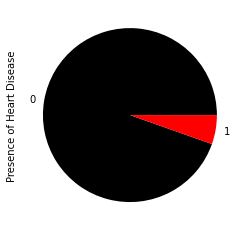

In [9]:
class_counts =  heart_data['heart_disease'].value_counts()
colors = ['black', 'red']
class_counts.plot(kind='pie', colors=colors)
plt.ylabel('Presence of Heart Disease')
plt.show()
#EDA stands for exploratory data analysis. 
#minority have heart issues

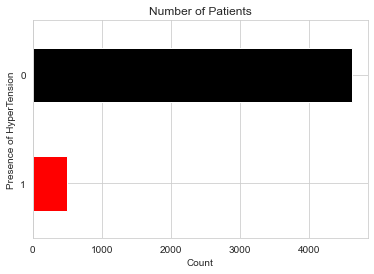

In [10]:
hypertension_counts =  heart_data['hypertension'].value_counts().sort_values(ascending=True)
sns.set_style("whitegrid")
colors = ['red', 'black']

# Create horizontal bar chart of airline counts
hypertension_counts.plot(kind='barh', color=colors)
plt.title("Number of Patients")
plt.xlabel("Count")
plt.ylabel("Presence of HyperTension")
plt.show()

<AxesSubplot:>

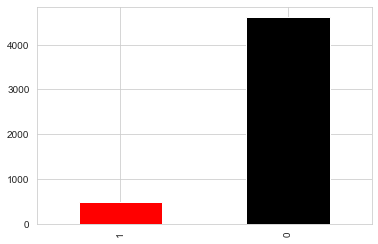

In [11]:
hypertension_counts.plot(kind='bar', color=colors)
#made it vertical

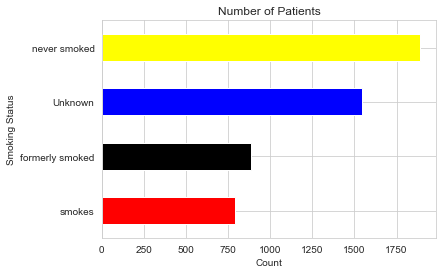

In [12]:
smoking_counts =  heart_data['smoking_status'].value_counts().sort_values(ascending=True)
sns.set_style("whitegrid")
colors = ['red', 'black', 'blue', 'yellow']

# Create horizontal bar chart of airline counts
smoking_counts.plot(kind='barh', color=colors)
plt.title("Number of Patients")
plt.xlabel("Count")
plt.ylabel("Smoking Status")
plt.show()

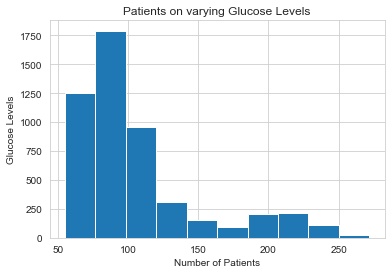

In [13]:
plt.hist( heart_data['avg_glucose_level'], bins=10)

plt.title('Patients on varying Glucose Levels')
plt.xlabel('Number of Patients')
plt.ylabel('Glucose Levels')

# Show the plot
plt.show()

In [14]:
# IDENTIFYING CATEGORICAL VARIABLES IN THE DATASET

cat_cols = list( heart_data.select_dtypes(include=['object']).columns)
print(f"Number of categorical columns: {len(cat_cols)}")
print(f"Categorical columns:\n{cat_cols}")

Number of categorical columns: 5
Categorical columns:
['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']


In [15]:
# PERFORMING TARGET ENCODING FOR ALL CATERGOTICAL VARIABLES

import category_encoders as ce

te = ce.TargetEncoder(cols=cat_cols)
heart_data = te.fit_transform( heart_data,  heart_data['stroke'])

In [16]:
 heart_data

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0.051064,67.0,0,1,0.065613,0.050940,0.052003,228.69,36.600000,0.079096,1
1,51676,0.047094,61.0,0,0,0.065613,0.079365,0.045346,202.21,28.893237,0.047569,1
2,31112,0.051064,80.0,0,1,0.065613,0.050940,0.045346,105.92,32.500000,0.047569,1
3,60182,0.047094,49.0,0,0,0.065613,0.050940,0.052003,171.23,34.400000,0.053232,1
4,1665,0.047094,79.0,1,0,0.065613,0.079365,0.045346,174.12,24.000000,0.047569,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5105,18234,0.047094,80.0,1,0,0.065613,0.050940,0.052003,83.75,28.893237,0.047569,0
5106,44873,0.047094,81.0,0,0,0.065613,0.079365,0.052003,125.20,40.000000,0.047569,0
5107,19723,0.047094,35.0,0,0,0.065613,0.079365,0.045346,82.99,30.600000,0.047569,0
5108,37544,0.051064,51.0,0,0,0.065613,0.050940,0.045346,166.29,25.600000,0.079096,0


In [17]:
# IDENTIFYING NUMERICAL COLUMNS

numeric_cols =  heart_data.select_dtypes(include=['float64', 'int64']).columns.tolist()
print(numeric_cols)

['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'avg_glucose_level', 'bmi', 'smoking_status', 'stroke']


In [18]:
# # MIN MAX SCALER
#we will discuss this. 

names =  heart_data.columns
indexes =  heart_data.index
sc = MinMaxScaler((0, 1)) #between 0 and 1 range
heart_data = sc.fit_transform( heart_data)
data_scaled = pd.DataFrame( heart_data, columns=names, index=indexes)
data_scaled.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0.123214,1.000000,0.816895,0.0,1.0,1.0,0.628208,1.0,0.801265,0.301260,1.000000,1.0
1,0.708205,0.542445,0.743652,0.0,0.0,1.0,1.000000,0.0,0.679023,0.212981,0.352031,1.0
2,0.426015,1.000000,0.975586,0.0,1.0,1.0,0.628208,0.0,0.234512,0.254296,0.352031,1.0
3,0.824928,0.542445,0.597168,0.0,0.0,1.0,0.628208,1.0,0.536008,0.276060,0.468425,1.0
4,0.021929,0.542445,0.963379,1.0,0.0,1.0,1.000000,0.0,0.549349,0.156930,0.352031,1.0


In [19]:
# SETTING TARGET VARIABLES

y = data_scaled['stroke']

# Extract the input features
x = data_scaled.drop(['stroke','id'], axis=1)

In [20]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE


# Split the dataset into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Apply SMOTE to oversample the minority class


In [21]:
smote = SMOTE(random_state=42)
x_train_resampled, y_train_resampled = smote.fit_resample(x_train, y_train)

In [22]:
x_train.shape, y_train.shape, x_train_resampled.shape, y_train_resampled.shape

((4088, 10), (4088,), (7802, 10), (7802,))

# ML MODELS

### LOGISTIC REGRESSION

In [37]:
from sklearn.linear_model import LogisticRegression

# Fit the logistic regression model to the training data
model = LogisticRegression(max_iter=1000, penalty='l2')
    
model.fit(x_train_resampled, y_train_resampled)
#model.fit(x_train , y_train )

y_test_probs = model.predict_proba(x_test)[:,1]
y_test_probs

array([0.0538033 , 0.0865078 , 0.0306868 , ..., 0.2805882 , 0.3933253 ,
       0.85557764])

In [39]:
# Make predictions on the testing data
y_pred = model.predict(x_test)

y_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [56]:
 

# Evaluate the model performance
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7553816046966731


In [42]:
#Metrics. In classification we use accuracy as key metric. In regression we use error as key metric. 
#(Mean square Error)

In [43]:
model.coef_
#same as in linear regression

array([[-3.54218537e-02,  7.22558466e+00,  3.81466158e-01,
         2.20408803e-01, -2.88252395e-01, -1.45611265e+00,
        -7.15874304e-02,  9.64812361e-01,  5.73994497e-02,
        -2.67928058e-03]])

In [45]:
#Terminology
#Binary classification
#True Positive  (tp)  Actual = Predicted = positive
#True Negative  (fp) Actual = Predicted = Negative
#False  Positive  (fn) Actual = Negative  Predicted = positive
#False Negative  Actual = Positive Predicted = Negative




In [52]:
from sklearn.metrics import confusion_matrix
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

tp, tn, fp, fn

(48, 724, 236, 14)

In [ ]:
#observation

#Number of people who had high stroke probability BUT were predicted low - 14
#Number of people who had low stroke probability BUT were predicted high - 236
#You may say this is not good. But

In [49]:
accuracy  = (tp+tn)/(tp+tn+fp+fn)
accuracy 

0.7553816046966731

In [50]:
precision  =  tp/(tp+fp)
precision 
#must be close to 1 NORMALLY.
#BUT it also depends on business you are in 
# ALSO CALLED positive predictive value 
#this tells us how likely someone is to have the characteristic if the test is positive

0.16901408450704225

In [51]:
recall = tp/(tp+fn)
recall
#sensitivity
#The sensitivity tells us how likely to be +ve in someone who has the characteristic for positive


0.7741935483870968

In [58]:
specificity = tn/(tn+fp)
specificity
#specificity
#The specificity tells us how likely the test is to come back negative in someone who does not have the characteristi

0.7541666666666667

In [60]:
NPV = tn/(tn+fn)

#negative predictive value (NPV), divide TN by (TN+FN). 
#The negative predictive value tells us how likely someone is to not have the 
#characteristic if the test is negative
NPV

0.981029810298103

/Users/venkateshkalakkad/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_precision_recall_curve is deprecated; Function `plot_precision_recall_curve` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: PrecisionRecallDisplay.from_predictions or PrecisionRecallDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


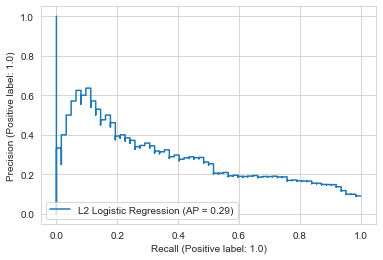

In [54]:
plot_precision_recall_curve(model, x_test, y_test, name = 'L2 Logistic Regression');

In [ ]:
#People interested - logloss function (cost function for logistic regression similar to MSE in Linear)
#entropy and cross entropy
#How does the logistic regression work - 
#https://web.stanford.edu/~jurafsky/slp3/5.pdf (until section 5.2.1)
    
    

